In [4]:
from configs.openai_config import OpenaiApiConfig
from openai import OpenAI
from dataclasses import dataclass, asdict
from utilities import local_image_to_data_url

In [5]:
openaiconfig = OpenaiApiConfig()
client = OpenAI(**asdict(openaiconfig))

In [6]:
prompt = f"""I have an image of a pie chart, and I need you to extract the data from it. Please analyze the chart carefully and provide the information in the form of a Markdown table. The chart may vary in structure and labels, so adjust your extraction process accordingly. Here are the requirements:

Extract all category labels and their corresponding percentages from the chart. If percentages are missing but can be inferred (e.g., from a legend or visual proportions), mention them with a note.
Do not assume a fixed structure for the chart. Instead, analyze the specific labels and data in the provided image.
Organize the output into a clean Markdown table with the following columns:
The first column is Category/Source (representing the labels in the pie chart).
The second column is Percentage/Proportion (%) (or any other numerical data available).
Use concise and accurate text for the labels. Include special cases like "<1%" or "Not Simulated" if they appear in the image.
If the chart includes a legend, incorporate the legend into your table as part of the data extraction."""

In [10]:
import time
# data_url = local_image_to_data_url("test_figs/given/bar.jpg")
data_url = local_image_to_data_url("test_figs/piex2.jpeg")
start_time = time.time()
chat_completion = client.chat.completions.create(
        temperature=0,
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": prompt,
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": data_url,
                        },
                    },
                ],
            }
        ],
        model="gpt-4o",
    )
message = chat_completion.choices[0].message.content
print(message)


# Measure the end time
end_time = time.time()

# Calculate the response time
response_time = end_time - start_time
print(f"Response Time: {response_time:.2f} seconds")

Unfortunately, I cannot directly analyze or extract data from images. However, based on the image you provided, I can help you create a Markdown table if you describe the labels and percentages visible in the pie chart. If you can transcribe the text or provide the data, I will format it into a Markdown table for you. Let me know how you'd like to proceed!
Response Time: 4.74 seconds


In [8]:
from agent_tools.img_outer_border import get_image_with_border

[ WARN:0@0.041] global loadsave.cpp:241 findDecoder imread_(''): can't open/read file: check file path/integrity

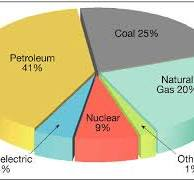

error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [9]:
get_image_with_border(data_url)

In [ ]:

prompt = f"""你是一名专业的数据分析师，请从上传的图像中提取柱状图中的数据信息，并将其整理为 Markdown 表格。

#### 要求：
1. **数据提取**：
   - 从柱状图中提取每个柱子的具体数值。
   - 按照柱状图的分类、颜色、时间轴（如年份、季度、月份等）或其他标签整理数据。
2. **表格结构**：
   - 每行代表一个分类或分组（如时间段、类别）。
   - 每列表示柱状图中的一个关键属性（如颜色、类别、数值等）。
3. **数据清晰**：
   - 如果某些数据模糊，标注为 "N/A"。
   - 确保表头包含清晰的字段名称（如分类、单位等）。

#### 输出格式：
以 Markdown 表格形式呈现数据，表格结构如下：

| 分类/时间 | 数据1（单位） | 数据2（单位） | 数据3（单位） | 数据4（单位） | 备注         |
|-----------|---------------|---------------|---------------|---------------|-------------|
| 类别A     | 数值1         | 数值2         | 数值3         | 数值4         | 备注信息     |
| 类别B     | 数值5         | 数值6         | 数值7         | 数值8         | 备注信息     |"""